In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import string
import re
import nltk
import json
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import wordnet as wn
import spacy
from collections import Counter

nlp=spacy.load("en_core_web_sm")

In [2]:
data=pd.read_json("../data/all_series_lines.json")

### Get all the Captains' lines

Get the captains' lines and tag using spacy's english language model.

In [6]:
kirk_lines=[]
picard_lines=[]
sisko_lines=[]
janeway_lines=[]
archer_lines=[]

episodes=data['TOS'].keys()
for ep in episodes:
    if data['TOS'][ep] is not np.NaN:
        if 'KIRK' in data['TOS'][ep].keys():
            kirk_lines.append(data['TOS'][ep]['KIRK'])

kirk_lines=[item for sublist in kirk_lines for item in sublist]
kirk_lines=' '.join(kirk_lines)

episodes=data['TNG'].keys()
for ep in episodes:
    if data['TNG'][ep] is not np.NaN:
        picard_lines.append(data['TNG'][ep]['PICARD'])

picard_lines=[item for sublist in picard_lines for item in sublist]
picard_lines=' '.join(picard_lines)

episodes=data['DS9'].keys()
for ep in episodes:
    if data['DS9'][ep] is not np.NaN:
        sisko_lines.append(data['DS9'][ep]['SISKO'])
    
sisko_lines=[item for sublist in sisko_lines for item in sublist]
sisko_lines=' '.join(sisko_lines)

episodes=data['VOY'].keys()
for ep in episodes:
    if data['VOY'][ep] is not np.NaN:
        janeway_lines.append(data['VOY'][ep]['JANEWAY'])

janeway_lines=[item for sublist in janeway_lines for item in sublist]
janeway_lines=' '.join(janeway_lines)

episodes=data['ENT'].keys()
for ep in episodes:
    if data['ENT'][ep] is not np.NaN:
        archer_lines.append(data['ENT'][ep]['ARCHER'])

archer_lines=[item for sublist in archer_lines for item in sublist]
archer_lines=' '.join(archer_lines)

In [7]:
kirk_lines_nlp=nlp(kirk_lines)
print('kirk done...')
picard_lines_nlp=nlp(picard_lines)
print('picard done...')
sisko_lines_nlp=nlp(sisko_lines)
print('sisko done...')
janeway_lines_nlp=nlp(janeway_lines)
print('janeway done...')
archer_lines_nlp=nlp(archer_lines)
print('archer done...')

kirk done...
picard done...
sisko done...
janeway done...
archer done...


### Total Vocabulary size

Greater vocabulary implies greater intelligence.

In [8]:
print(len(kirk_lines_nlp))
print(len(picard_lines_nlp))
print(len(sisko_lines_nlp))
print(len(janeway_lines_nlp))
print(len(archer_lines_nlp))

133342
179559
121776
165089
107435


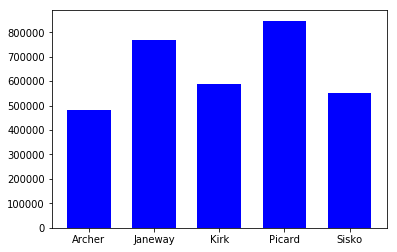

In [9]:
y = [len(kirk_lines),len(picard_lines),len(sisko_lines),len(janeway_lines),len(archer_lines)]
x = ['Kirk', 'Picard','Sisko','Janeway','Archer']
width = 1/1.5
plt.bar(x, y, width, color="blue")
plt.show()

### Complex words

Lower number of contexts implies more complex vocabulary. Calculate number of complex words using nltk wordnet.

In [10]:
for word in sisko_lines_nlp[1:2]:
    print(str(word.text)+" "+str(wn.synsets(word.text)[0]))

auxiliary Synset('aide.n.02')


In [11]:
help(wn.synsets)

Help on method synsets in module nltk.corpus.reader.wordnet:

synsets(lemma, pos=None, lang='eng', check_exceptions=True) method of nltk.corpus.reader.wordnet.WordNetCorpusReader instance
    Load all synsets with a given lemma and part of speech tag.
    If no pos is specified, all synsets for all parts of speech
    will be loaded.
    If lang is specified, all the synsets associated with the lemma name
    of that language will be returned.



### Common words

In [50]:
words = [token.lemma_ for token in sisko_lines_nlp if token.is_stop != True and token.is_punct != True]
ents = [ent.text for ent in sisko_lines_nlp.ents]
nouns = [token.lemma_ for token in sisko_lines_nlp if token.is_stop != True and token.is_punct != True and token.pos_ == "NOUN"]
noun_chunk = [chunk for chunk in sisko_lines_nlp.noun_chunks]

word_types=[words,ents,nouns,noun_chunk]

for typ in word_types:
    freq = Counter(typ)
    common = freq.most_common(10)
    print("common: "+str(common))

common: [('-PRON-', 5956), ('be', 2687), ('not', 1324), ('will', 623), ('know', 529), ('go', 528), ('want', 489), ('what', 438), ('have', 429), ('the', 428)]
common: [('Dax', 152), ('Jake', 126), ('Bajor', 120), ('one', 115), ('Dominion', 107), ('Worf', 102), ('first', 93), ('Federation', 89), ("O'Brien", 88), ('Starfleet', 88)]
common: [('what', 423), ('time', 269), ('way', 257), ('ship', 232), ('station', 213), ('thing', 161), ('people', 153), ('man', 147), ('day', 97), ('year', 95)]
common: [(Reroute auxiliary power, 1), (Full reverse, 1), (Damage report, 1), (Damage report, 1), (everything, 1), (your assignedevacuation area, 1), (Doran, 1), (you, 1), (Jennifer, 1), (Jennifer, 1)]


### Which other character so each Captain mention the most?

In [54]:
captains=['Kirk','Picard','Sisko','Janeway','Archer']
lines=[kirk_lines_nlp,picard_lines_nlp,sisko_lines_nlp,janeway_lines_nlp,archer_lines_nlp]              
for i,captain in enumerate(captains):
    ents = [ent.text for ent in lines[i].ents if ent.label_=="PERSON"]
    freq = Counter(ents)
    common = freq.most_common(1)
    print(str(captain)+": "+str(common[0][0]))

Kirk: Spock
Picard: Data
Sisko: Dax
Janeway: Chakotay
Archer: T'Pol


### Sentiment - word association